In [3]:
import sportsdataverse.mbb as mbb
import pandas as pd
import numpy as np
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [4]:
def timer(function):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        results = function(*args, **kwargs)
        end = time.perf_counter()
        print(f'{function.__name__}: {round(end-start, 2)}')
        return results
    return wrapper

@timer
def load_team_data(start_year: int, end_year: int) -> pd.DataFrame:
    return mbb.load_mbb_team_boxscore(seasons=range(start_year, end_year))

team_data = load_team_data(start_year=2017, end_year=2023)
team_data

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:14<00:00,  2.40s/it]

load_team_data: 14.42


,game_id,season,season_type,game_date,game_date_time,team_id,team_uid,team_slug,team_location,team_name,...,opponent_team_slug,opponent_team_location,opponent_team_name,opponent_team_abbreviation,opponent_team_display_name,opponent_team_short_display_name,opponent_team_color,opponent_team_alternate_color,opponent_team_logo,opponent_team_score
0,400949246,2017,3,2017-04-03,2017-04-03 21:20:00-04:00,2250,s:40~l:41~t:2250,gonzaga-bulldogs,Gonzaga,Bulldogs,...,north-carolina-tar-heels,North Carolina,Tar Heels,UNC,North Carolina Tar Heels,North Carolina,7bafd4,13294b,https://a.espncdn.com/i/teamlogos/ncaa/500/153...,71
1,400949246,2017,3,2017-04-03,2017-04-03 21:20:00-04:00,153,s:40~l:41~t:153,north-carolina-tar-heels,North Carolina,Tar Heels,...,gonzaga-bulldogs,Gonzaga,Bulldogs,GONZ,Gonzaga Bulldogs,Gonzaga,041e42,c8102e,https://a.espncdn.com/i/teamlogos/ncaa/500/225...,65
2,400948853,2017,3,2017-04-01,2017-04-01 21:05:00-04:00,2483,s:40~l:41~t:2483,oregon-ducks,Oregon,Ducks,...,north-carolina-tar-heels,North Carolina,Tar Heels,UNC,North Carolina Tar Heels,North Carolina,7bafd4,13294b,https://a.espncdn.com/i/teamlogos/ncaa/500/153...,77
3,400948853,2017,3,2017-04-01,2017-04-01 21:05:00-04:00,153,s:40~l:41~t:153,north-carolina-tar-heels,North Carolina,Tar Heels,...,oregon-ducks,Oregon,Ducks,ORE,Oregon Ducks,Oregon,044520,fee123,https://a.espncdn.com/i/teamlogos/ncaa/500/248...,76
4,400948847,2017,3,2017-04-01,2017-04-01 18:09:00-04:00,2579,s:40~l:41~t:2579,south-carolina-gamecocks,South Carolina,Gamecocks,...,gonzaga-bulldogs,Gonzaga,Bulldogs,GONZ,Gonzaga Bulldogs,Gonzaga,041e42,c8102e,https://a.espncdn.com/i/teamlogos/ncaa/500/225...,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67947,401372031,2022,2,2021-11-09,2021-11-09 16:30:00-05:00,222,s:40~l:41~t:222,villanova-wildcats,Villanova,Wildcats,...,mount-st-marys-mountaineers,Mount St. Mary's,Mountaineers,MSM,Mount St. Mary's Mountaineers,Mount St Mary,005596,ebebeb,https://a.espncdn.com/i/teamlogos/ncaa/500/116...,51
67948,401373111,2022,2,2021-11-09,2021-11-09 15:00:00-05:00,2016,s:40~l:41~t:2016,alcorn-state-braves,Alcorn State,Braves,...,washington-state-cougars,Washington State,Cougars,WSU,Washington State Cougars,Washington St,94022a,6a747c,https://a.espncdn.com/i/teamlogos/ncaa/500/265...,85
67949,401373111,2022,2,2021-11-09,2021-11-09 15:00:00-05:00,265,s:40~l:41~t:265,washington-state-cougars,Washington State,Cougars,...,alcorn-state-braves,Alcorn State,Braves,ALCN,Alcorn State Braves,Alcorn St,4b0058,46166a,https://a.espncdn.com/i/teamlogos/ncaa/500/201...,67
67950,401365200,2022,2,2021-11-09,2021-11-09 15:00:00-05:00,2879,s:40~l:41~t:2879,manhattanville-valiants,Manhattanville,Valiants,...,manhattan-jaspers,Manhattan,Jaspers,MAN,Manhattan Jaspers,Manhattan,4f8537,b5b7ba,https://a.espncdn.com/i/teamlogos/ncaa/500/236...,99


In [5]:
team_data[['team_score', 'team_winner', 'assists',
                'blocks', 'defensive_rebounds', 'field_goals_made', 'field_goals_attempted', 'fouls', 
                 'free_throws_made', 'free_throws_attempted', 'offensive_rebounds', 'steals',
                 'three_point_field_goals_made', 
                'three_point_field_goals_attempted', 'total_turnovers',
                'opponent_team_score']].corr()

,team_score,team_winner,assists,blocks,defensive_rebounds,field_goals_made,field_goals_attempted,fouls,free_throws_made,free_throws_attempted,offensive_rebounds,steals,three_point_field_goals_made,three_point_field_goals_attempted,total_turnovers,opponent_team_score
team_score,1.000000,0.515442,0.647797,0.165244,0.339221,0.879416,0.408525,0.074541,0.414046,0.371639,0.142835,0.211109,0.511717,0.202342,-0.191810,0.075100
team_winner,0.515442,1.000000,0.403701,0.215005,0.426449,0.426101,-0.015820,-0.219577,0.280045,0.252239,0.028180,0.180122,0.228149,-0.036372,-0.181384,-0.515442
assists,0.647797,0.403701,1.000000,0.155814,0.260828,0.669047,0.285059,-0.097157,-0.011783,-0.021755,0.052129,0.169382,0.530310,0.286131,-0.112927,-0.094860
blocks,0.165244,0.215005,0.155814,1.000000,0.265816,0.151319,0.081710,-0.040994,0.094224,0.104356,0.098686,0.077484,0.016155,-0.018536,0.008822,-0.187683
defensive_rebounds,0.339221,0.426449,0.260828,0.265816,1.000000,0.300355,0.202559,-0.049479,0.179081,0.191104,0.089443,-0.054936,0.094179,0.056552,0.074602,-0.361695
field_goals_made,0.879416,0.426101,0.669047,0.151319,0.300355,1.000000,0.538398,-0.028511,-0.011410,-0.016873,0.142869,0.219067,0.408408,0.145004,-0.215527,0.030348
field_goals_attempted,0.408525,-0.015820,0.285059,0.081710,0.202559,0.538398,1.000000,0.080591,-0.143734,-0.134784,0.570208,0.230601,0.206371,0.417149,-0.250437,0.246713
fouls,0.074541,-0.219577,-0.097157,-0.040994,-0.049479,-0.028511,0.080591,1.000000,0.231798,0.264431,0.076045,-0.001311,-0.029461,0.007776,0.215689,0.304983
free_throws_made,0.414046,0.280045,-0.011783,0.094224,0.179081,-0.011410,-0.143734,0.231798,1.000000,0.930082,0.094679,0.073577,-0.107277,-0.169385,0.008361,0.081521
free_throws_attempted,0.371639,0.252239,-0.021755,0.104356,0.191104,-0.016873,-0.134784,0.264431,0.930082,1.000000,0.147033,0.095777,-0.135612,-0.187728,0.033533,0.084904


In [6]:
team_data.columns
needed_cols = ['game_id', 'season', 'team_id', 'team_location', 'team_score', 'team_winner', 'assists',
                'blocks', 'defensive_rebounds', 'field_goals_made', 'field_goals_attempted', 'fouls', 
                 'free_throws_made', 'free_throws_attempted', 'offensive_rebounds', 'steals',
                 'three_point_field_goals_made', 
                'three_point_field_goals_attempted', 'total_turnovers',
                'opponent_team_score']
print(len(needed_cols))
def get_ppa_two(row):
    total_points = 2 * row['two_point_made']
    total_attempts = row['two_point_attempted']
    if total_attempts > 0:
        return total_points / total_attempts
    else:
        return 0

def get_ppa_three(row):
    total_points = 3 * row['three_point_field_goals_made']
    total_attempts = row['three_point_field_goals_attempted']
    if total_attempts > 0:
        return total_points / total_attempts
    else:
        return 0

def get_total_ppa(row):
    total_points = 2 * row['two_point_made'] + 3 * row['three_point_field_goals_made']
    total_attempts = row['field_goals_attempted']
    if total_attempts > 0:
        return total_points / total_attempts
    else:
        return 0

def team_scoring_poss(row):
    team_attempts = row['field_goals_made']
    if row['free_throws_attempted'] > 0:
        inner_part = (1 - (1 - (row['free_throws_made'] / row['free_throws_attempted']) ** 2))
    else:
        inner_part = 0
    return team_attempts + inner_part *  row['free_throws_attempted'] * 0.4

def team_play_percent(row):
    numerator = row['scoring_possesions']
    denom = row['field_goals_attempted'] + row['free_throws_attempted'] * 0.4 + row['total_turnovers']
    if denom > 0:
        return numerator / denom
    else:
        return 0

def possesions(row):
    fga = row['field_goals_attempted']
    other_team_def_rebounds = (row['field_goals_attempted'] - row['field_goals_made']) - row['offensive_rebounds']
    reb_part = row['offensive_rebounds']/(row['offensive_rebounds'] + other_team_def_rebounds)
    fg_part = row['field_goals_attempted'] - row['field_goals_made']
    return fga - reb_part * fg_part * 1.07 + row['total_turnovers'] + row['free_throws_attempted'] * 0.4

def offensive_efficiency(row):
    num = row['field_goals_made'] + row['assists']
    denom = row['field_goals_attempted'] - row['offensive_rebounds'] + row['assists'] + row['total_turnovers']
    if denom != 0:
        return num / denom
    else:
        return 0

def efficient_offense(row):
    inner = .76 * row['assists'] + row['team_score']
    return inner * row['offensive_efficiency']

def effective_fgp(row):
    num = row['field_goals_made'] + (.5 * row['three_point_field_goals_made'])
    denom = row['field_goals_attempted']
    if denom > 0:
        return num / denom
    else:
        return 0

def def_efficiency(row):
    return (row['opponent_team_score']/row['possesions'])

20


In [7]:
team_data_trim = team_data[needed_cols]
team_data_trim.loc[:, 'win'] = team_data_trim.loc[:, 'team_winner'].apply(lambda x: 1 if x is True else 0)
team_data_trim.loc[:, 'games'] = 1
team_data_trim['two_point_attempted'] = team_data_trim['field_goals_attempted'] - team_data_trim['three_point_field_goals_attempted']
team_data_trim['two_point_made'] = team_data_trim['field_goals_made'] - team_data_trim['three_point_field_goals_made']
team_data_trim['offensive_efficiency'] = team_data_trim.apply(offensive_efficiency, axis='columns')
team_data_trim['EFG%'] = team_data_trim.apply(effective_fgp, axis='columns')
team_data_trim['2PPA'] = team_data_trim.apply(get_ppa_two, axis='columns')
team_data_trim['3PPA'] = team_data_trim.apply(get_ppa_three, axis='columns')
team_data_trim['PPA'] = team_data_trim.apply(get_total_ppa, axis='columns')
team_data_trim['possesions'] = team_data_trim.apply(possesions, axis='columns')
team_data_trim['scoring_possesions'] = team_data_trim.apply(team_scoring_poss, axis='columns')
team_data_trim['team_play%'] = team_data_trim.apply(team_play_percent, axis='columns')
team_data_trim['def_efficiency'] = team_data_trim.apply(def_efficiency, axis='columns')
summary_data = (team_data_trim.copy()
                              .groupby(by=['team_location', 'season', 'team_id'], 
                                       as_index=False)
                              .agg({'win': np.sum,
                                    'games': np.sum,
                                    'team_score': np.mean,
                                    'assists': np.mean,
                                    'blocks': np.mean,
                                    'defensive_rebounds': np.mean,
                                    'field_goals_made': np.mean,
                                    'field_goals_attempted': np.mean,
                                    'free_throws_made': np.mean,
                                    'free_throws_attempted': np.mean,
                                    'offensive_rebounds': np.mean,
                                    'steals': np.mean,
                                    'total_turnovers': np.mean,
                                    'three_point_field_goals_made': np.mean,
                                    'three_point_field_goals_attempted': np.mean,
                                    'two_point_attempted': np.mean,
                                    'two_point_made': np.mean,
                                    'offensive_efficiency': np.mean,
                                    'EFG%': np.mean,
                                    '2PPA': np.mean,
                                    '3PPA': np.mean,
                                    'PPA': np.mean,
                                    'possesions': np.mean,
                                    'team_play%': np.mean,
                                    'def_efficiency': np.mean})
)

summary_data = summary_data[summary_data['games'] > 10]

In [143]:
from sklearn.preprocessing import MinMaxScaler

per_minute_columns = ['assists', 'blocks', 'defensive_rebounds',
       'field_goals_made', 'field_goals_attempted', 'free_throws_made',
       'free_throws_attempted', 'offensive_rebounds', 'steals',
       'total_turnovers', 'three_point_field_goals_made',
       'three_point_field_goals_attempted', 'two_point_attempted',
       'two_point_made', 'team_score']

clusters_data = summary_data.drop(columns=['team_location', 'season', 
                                           'team_id', 'win', 
                                           'games'])
for column in per_minute_columns:
    clusters_data[column] = clusters_data[column] / 40 
clusters_scaled = MinMaxScaler().fit_transform(clusters_data)

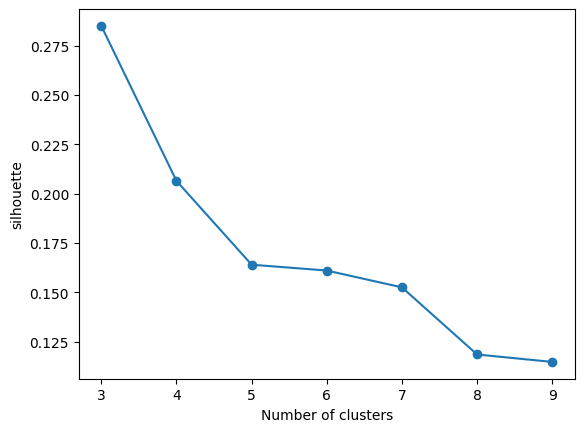

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(3, 10):
    km = KMeans(n_clusters=i,
                random_state=13,
                max_iter=1000,
                n_init='auto')
    km.fit(clusters_scaled)
    score = silhouette_score(clusters_scaled, km.labels_, metric='euclidean')
    silhouette_scores.append(score)

# plot
plt.plot(range(3, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.284979659096257
For n_clusters = 4 The average silhouette_score is : 0.2196353254472983
For n_clusters = 5 The average silhouette_score is : 0.16990765739544106
For n_clusters = 6 The average silhouette_score is : 0.13300131414418145
For n_clusters = 7 The average silhouette_score is : 0.12565543544753463
For n_clusters = 8 The average silhouette_score is : 0.11579584319088257
For n_clusters = 9 The average silhouette_score is : 0.11518755076121368


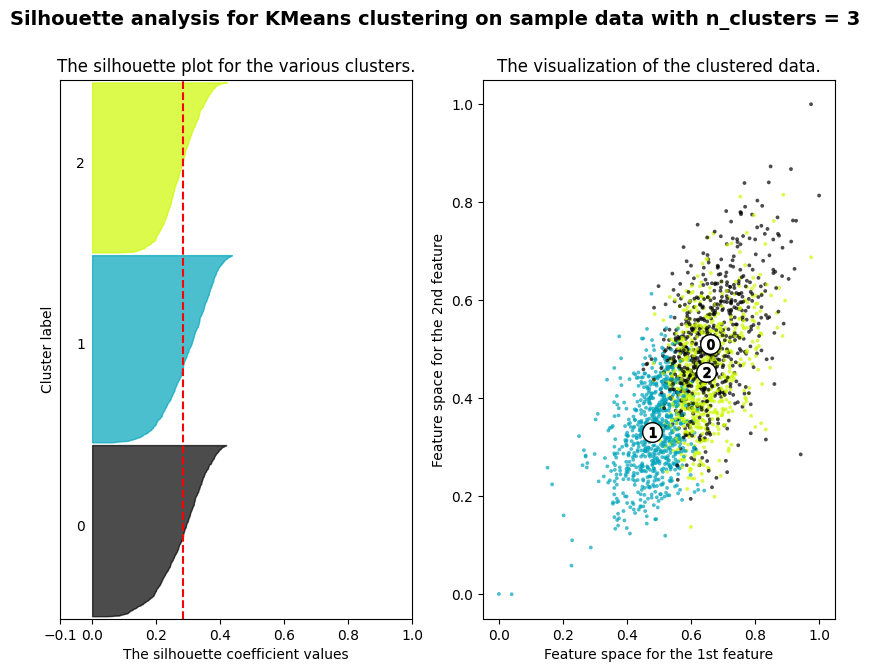

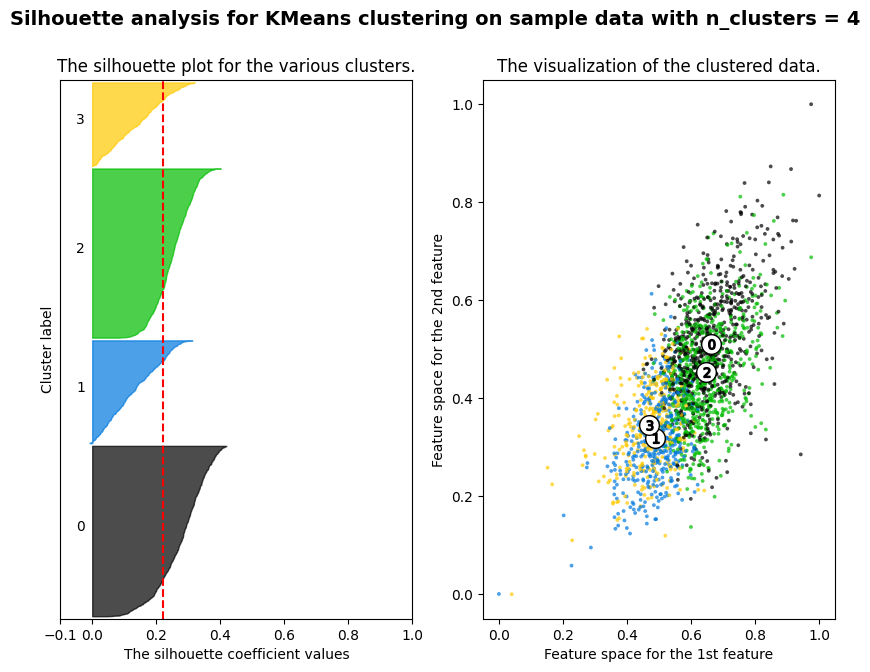

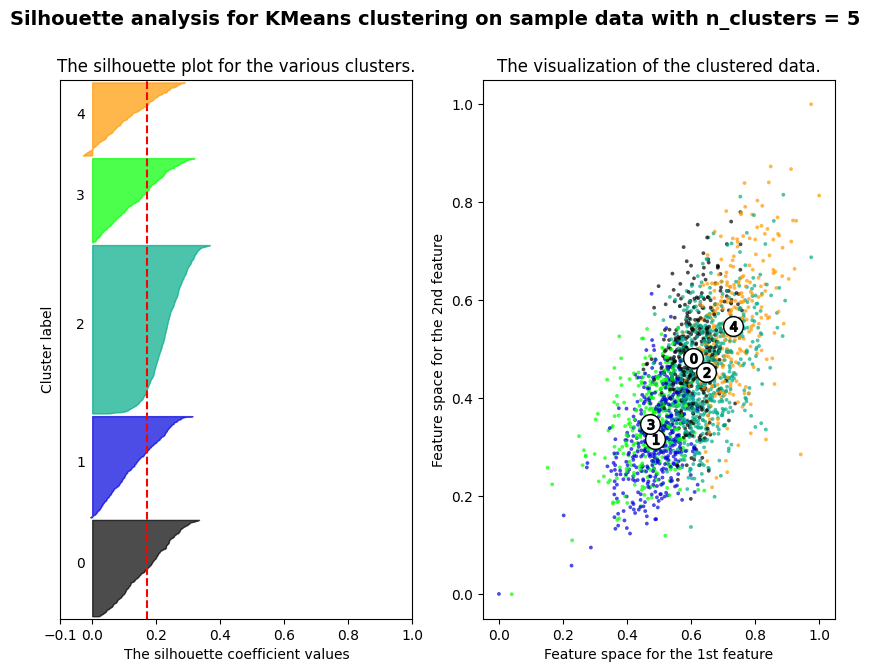

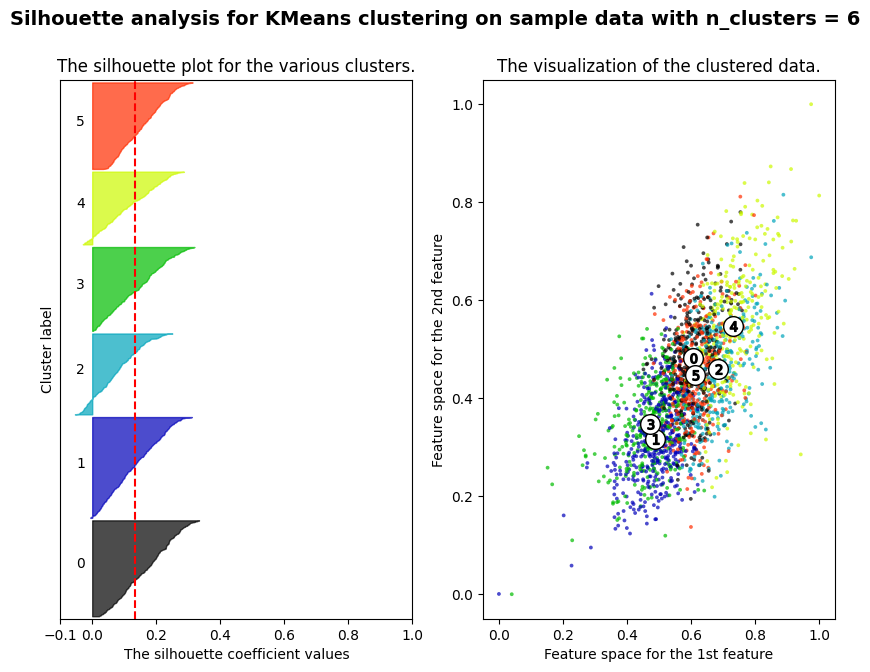

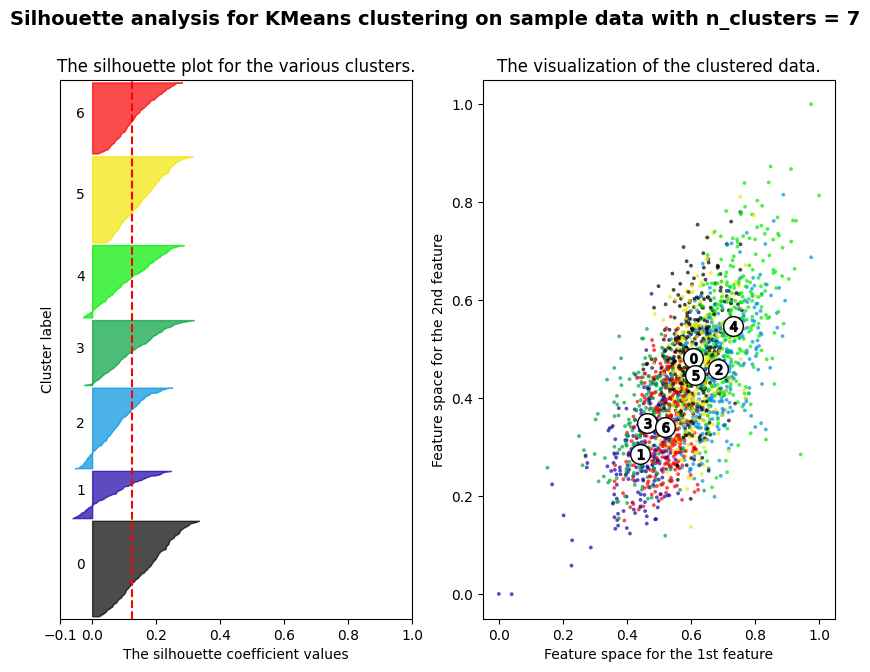

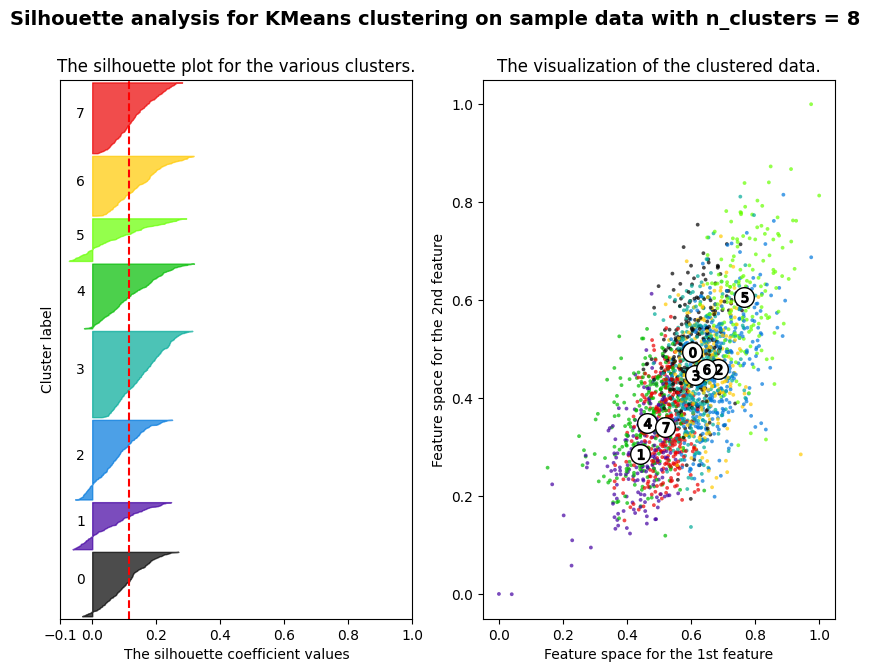

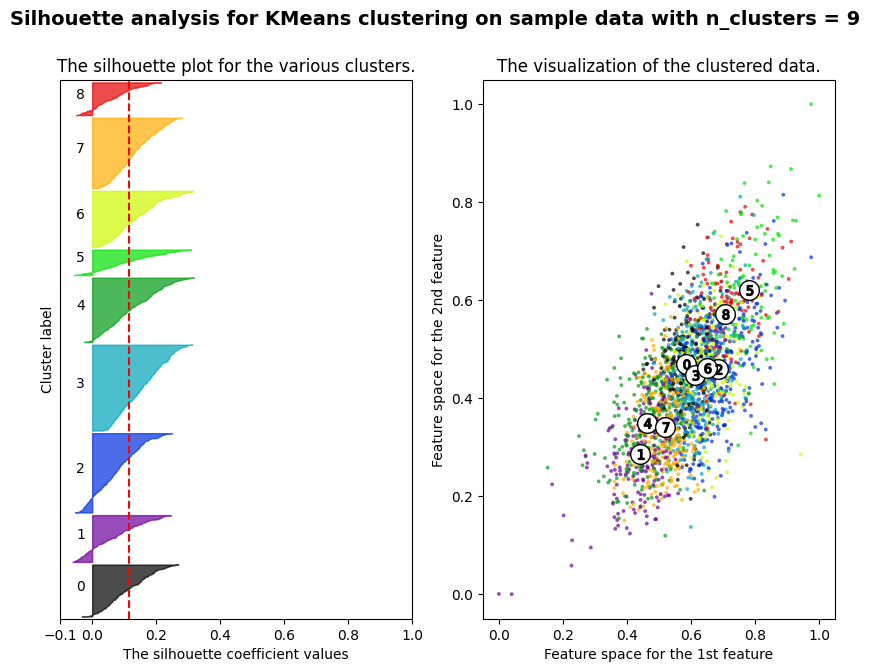

In [151]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


for n_clusters in range(3, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(clusters_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(clusters_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(clusters_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clusters_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        clusters_scaled[:, 0], clusters_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

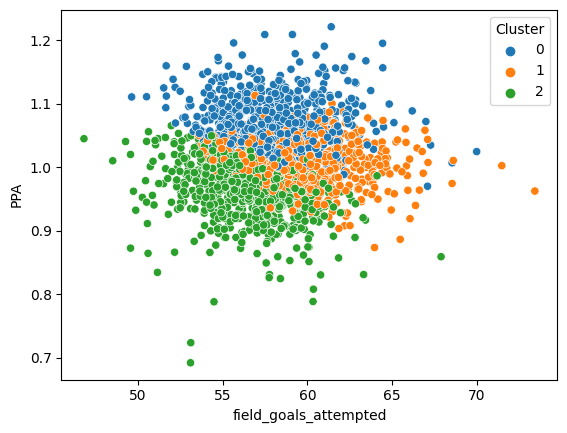

In [152]:
import seaborn as sns
kmeans = KMeans(n_clusters=3, 
                random_state=13, 
                max_iter=1000,
                n_init='auto').fit(clusters_scaled)
summary_data['Cluster'] = pd.Categorical(kmeans.predict(clusters_scaled))
sns.scatterplot(x='field_goals_attempted', y='PPA', data=summary_data, hue='Cluster');

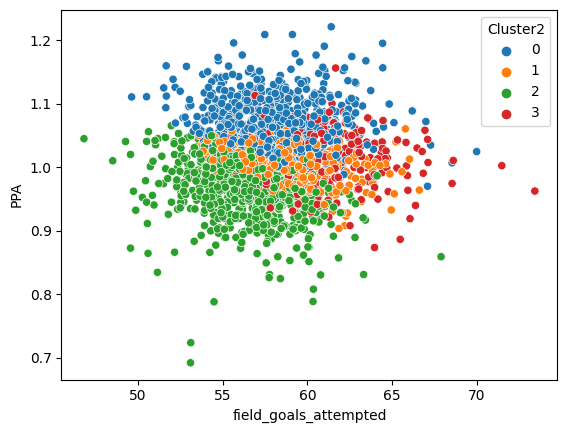

In [180]:
import seaborn as sns
kmeans = KMeans(n_clusters=4, 
                random_state=13, 
                max_iter=1000,
                n_init='auto').fit(clusters_scaled)
summary_data['Cluster2'] = pd.Categorical(kmeans.predict(clusters_scaled))
sns.scatterplot(x='field_goals_attempted', y='PPA', data=summary_data, hue='Cluster2');

In [192]:
from sklearn.decomposition import PCA

pc = PCA(n_components=5).fit(clusters_scaled)
sum(pc.explained_variance_ratio_)

0.8138702291224974

In [186]:
kmeans.predict(clusters_scaled)

array([0, 1, 0, ..., 1, 1, 0])

In [188]:
pd.DataFrame(pc.transform(clusters_scaled))

,0,1,2,3,4
0,-0.427462,0.240377,-0.017596,-0.215684,0.194070
1,-0.093529,-0.151412,0.258124,0.015950,-0.110004
2,-0.555200,0.016961,0.143014,-0.151514,0.050249
3,-0.054673,-0.393407,-0.047026,0.081941,-0.024591
4,-0.162660,-0.322703,0.206521,0.198062,-0.169909
...,...,...,...,...,...
2106,0.033312,-0.424572,0.452145,0.356061,0.261469
2107,-0.067020,0.056086,0.237818,0.451671,0.060776
2108,0.065957,-0.166087,0.155981,0.098981,0.212234
2109,0.029942,-0.236841,0.064444,0.039983,0.189934


In [189]:
summary_data[['pc1', 'pc2', 'pc3', 'pc4', 'pc5']] = pc.transform(clusters_scaled)


,team_location,season,team_id,win,games,team_score,assists,blocks,defensive_rebounds,field_goals_made,...,possesions,team_play%,def_efficiency,Cluster,Cluster2,pc1,pc2,pc3,pc4,pc5
0,Abilene Christian,2017,2000,13,29,69.275862,14.068966,2.862069,23.551724,24.862069,...,67.163103,0.375864,1.064488,0,0,-0.427462,0.240377,-0.017596,-0.215684,0.194070
1,Abilene Christian,2018,2000,16,32,73.718750,15.031250,4.000000,24.656250,27.187500,...,69.876250,0.384747,1.024532,1,1,-0.093529,-0.151412,0.258124,0.015950,-0.110004
2,Abilene Christian,2019,2000,27,34,73.588235,15.411765,2.735294,23.000000,26.382353,...,65.407059,0.398829,0.975438,0,0,-0.555200,0.016961,0.143014,-0.151514,0.050249
3,Abilene Christian,2020,2000,20,31,75.870968,14.870968,2.612903,22.741935,26.258065,...,69.884194,0.382006,0.938762,1,3,-0.054673,-0.393407,-0.047026,0.081941,-0.024591
4,Abilene Christian,2021,2000,24,29,75.724138,17.689655,2.965517,24.586207,27.103448,...,69.869655,0.376025,0.868198,1,3,-0.162660,-0.322703,0.206521,0.198062,-0.169909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,Youngstown State,2018,2754,8,32,75.312500,13.906250,3.937500,22.031250,28.187500,...,72.252187,0.355970,1.150495,1,3,0.033312,-0.424572,0.452145,0.356061,0.261469
3777,Youngstown State,2019,2754,12,32,75.468750,14.031250,3.593750,24.562500,27.468750,...,69.670625,0.366183,1.134710,1,1,-0.067020,0.056086,0.237818,0.451671,0.060776
3778,Youngstown State,2020,2754,18,33,72.757576,12.515152,2.575758,25.212121,26.363636,...,67.049091,0.367366,1.063670,1,1,0.065957,-0.166087,0.155981,0.098981,0.212234
3779,Youngstown State,2021,2754,15,27,74.444444,12.925926,1.629630,23.851852,26.555556,...,67.611481,0.379370,1.076348,1,1,0.029942,-0.236841,0.064444,0.039983,0.189934


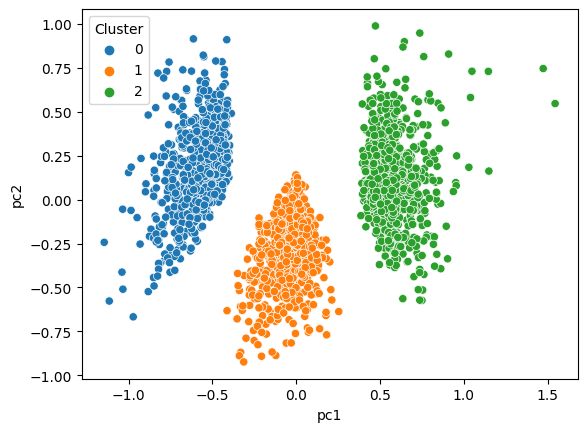

In [191]:
sns.scatterplot(x='pc1', y='pc2', data=summary_data, hue='Cluster');

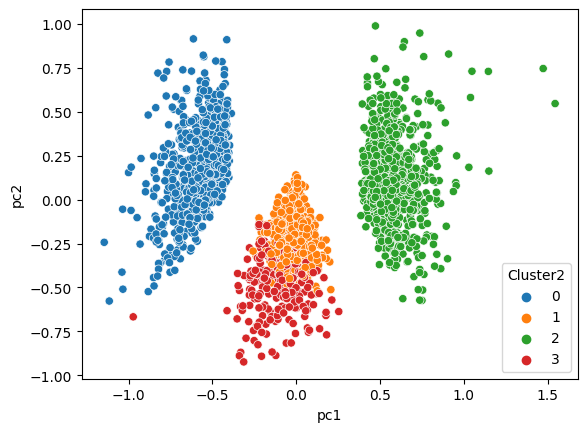

In [190]:
sns.scatterplot(x='pc1', y='pc2', data=summary_data, hue='Cluster2');

In [176]:
summary_data.groupby(by=['Cluster'])[['offensive_efficiency', 'def_efficiency', 'team_score', 'possesions', 'PPA', 'field_goals_attempted']].mean()

,offensive_efficiency,def_efficiency,team_score,possesions,PPA,field_goals_attempted
Cluster,,,,,,
0,0.543426,1.042632,75.293106,67.575244,1.074445,57.965189
1,0.529715,1.040303,74.677837,69.239971,1.008358,59.743885
2,0.491767,1.062304,66.906468,66.699932,0.965451,56.454946


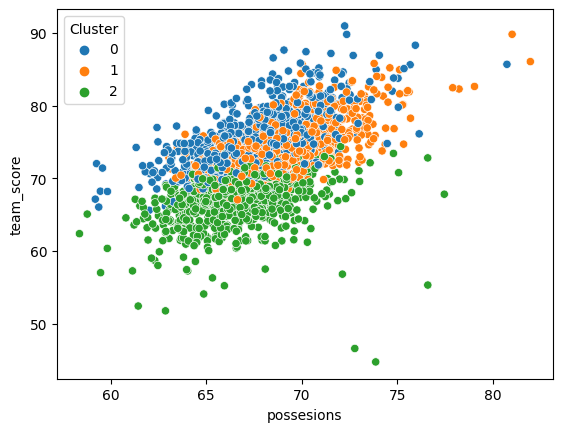

In [153]:
sns.scatterplot(x='possesions', y='team_score', data=summary_data, hue='Cluster');

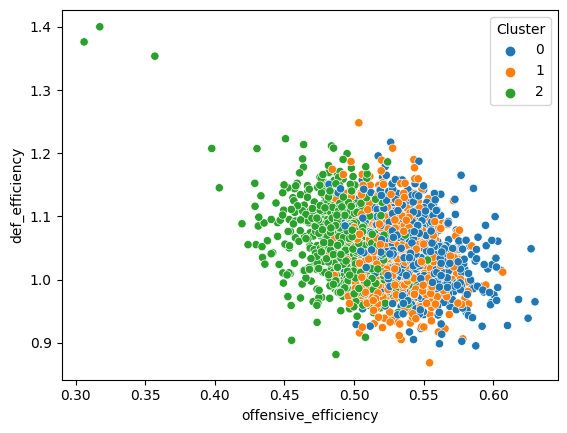

In [154]:
sns.scatterplot(x='offensive_efficiency', y='def_efficiency', data=summary_data, hue='Cluster');

In [155]:
summary_data[['team_location', 'season', 'Cluster']].to_csv('C:/Users/Jake/Documents/GitHub/Capstone/data/team_clusters.csv', index=False)


In [156]:
correlations = summary_data.drop(columns=['team_location', 'season', 'team_id']).corr()
correlations['Cluster'].sort_values()

PPA                                 -0.743414
EFG%                                -0.743414
team_play%                          -0.710503
offensive_efficiency                -0.678740
team_score                          -0.654638
2PPA                                -0.651193
field_goals_made                    -0.646574
assists                             -0.587401
3PPA                                -0.574120
win                                 -0.524816
three_point_field_goals_made        -0.505874
defensive_rebounds                  -0.326130
three_point_field_goals_attempted   -0.306288
two_point_made                      -0.299051
games                               -0.219984
field_goals_attempted               -0.217687
possesions                          -0.138323
free_throws_made                    -0.124774
blocks                              -0.077237
free_throws_attempted               -0.031961
steals                              -0.005925
two_point_attempted               

In [157]:
### Simple team model ###
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
cluster_zero = summary_data[summary_data['Cluster'] == 0]
cluster_one = summary_data[summary_data['Cluster'] == 1]
cluster_two = summary_data[summary_data['Cluster'] == 2]

In [167]:
from sklearn.model_selection import train_test_split, cross_val_score

features = ['blocks', 'defensive_rebounds',
       'free_throws_made', 'offensive_rebounds',
       'steals', 'total_turnovers',
       'three_point_field_goals_made', 'three_point_field_goals_attempted',
       'two_point_attempted', 'offensive_efficiency',
       'two_point_made', 'EFG%', '2PPA',
       '3PPA', 'def_efficiency', 'team_score', 'win']
per_minute_features = ['blocks', 'defensive_rebounds',
       'free_throws_made', 'offensive_rebounds',
       'steals', 'total_turnovers',
       'three_point_field_goals_made', 'three_point_field_goals_attempted',
       'two_point_attempted', 'two_point_made', 'team_score']
X = cluster_zero[features]
y = cluster_zero['win']
for col in per_minute_features:
    X[col] = X[col] / 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=13)
scaler_zero = MinMaxScaler().fit(X_train)
X_train_sc = scaler_zero.transform(X_train)
X_test_sc = scaler_zero.transform(X_test)

In [171]:
pd.DataFrame(X.corr().win)

,win
blocks,0.293401
defensive_rebounds,0.256515
free_throws_made,0.264635
offensive_rebounds,0.260929
steals,0.161674
total_turnovers,-0.343701
three_point_field_goals_made,-0.064826
three_point_field_goals_attempted,-0.158171
two_point_attempted,0.168810
offensive_efficiency,0.628997


In [160]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,blocks,1.619137e+01
1,defensive_rebounds,8.257022e+02
2,free_throws_made,2.252255e+06
3,offensive_rebounds,1.645146e+02
4,steals,8.487286e+01
5,total_turnovers,2.321330e+02
6,three_point_field_goals_made,8.606020e+06
7,three_point_field_goals_attempted,5.359414e+03
8,two_point_attempted,6.227534e+03
9,offensive_efficiency,5.101165e+03


In [161]:
import xgboost
import lightgbm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, HuberRegressor

lass = Lasso()
rid = Ridge(alpha=.1, random_state=13)
lr = LinearRegression()
enn = ElasticNet()
rf = RandomForestRegressor(random_state=13, n_estimators=100)
huber = HuberRegressor()
lgb = lightgbm.LGBMRegressor(random_state=13, n_estimators=100)
gbr = GradientBoostingRegressor(random_state=13, n_estimators=100)
sgd = SGDRegressor()
lass_cv = cross_val_score(lass, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
lr_cv = cross_val_score(lr, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
enn_cv = cross_val_score(enn, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
rid_cv = cross_val_score(rid, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
rf_cv = cross_val_score(rf, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
lgb_cv = cross_val_score(lgb, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
gbr_cv = cross_val_score(gbr, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
sgd_cv = cross_val_score(sgd, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
huber_cv = cross_val_score(huber, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(lgb_cv)

c:\Users\Jake\Documents\GitHub\env\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Jake\Documents\GitHub\env\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Jake\Documents\GitHub\env\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



[-3.28594111 -3.57904295 -3.46557319 -3.61922314 -3.67540651]


c:\Users\Jake\Documents\GitHub\env\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [124]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

params = {'n_estimators': randint(50, 5000),
          'learning_rate': uniform(0, 1),
          'reg_alpha': uniform(0, 1),
          'reg_lambda': uniform(0, 1)}

random_lgb = RandomizedSearchCV(lightgbm.LGBMRegressor(random_state=13),
                                param_distributions=params,
                                n_iter=25,
                                cv=5,
                                random_state=13)
#random_lgb.fit(X_train_sc, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=13), n_iter=25,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000157735C7D30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015772E8A0D0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001575C491700>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000015772A84520>},
                   random_state=13)

In [125]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = random_lgb.best_estimator_.predict(X_test_sc)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(rmse, r2)

3.6638716205281576 0.6043382829567967


In [126]:
y_test.sort_values().head(30)

3180     6
671      8
631      8
3489    10
2743    10
1071    11
766     11
3342    11
1361    11
3338    11
3433    12
771     12
11      12
14      12
793     12
3558    13
3181    13
138     13
0       13
980     13
3290    13
186     14
602     14
1304    14
2260    15
2176    15
69      15
3507    15
280     15
675     15
Name: win, dtype: int64

In [113]:
y_test['MY_VALUES']
y_test

1071                                                     11
2975                                                     16
766                                                      11
1797                                                     19
1269                                                     33
                                ...                        
1931                                                     17
2176                                                     15
3780                                                     19
index     Index([1071, 2975,  766, 1797, 1269, 2289, 375...
index2    [1071, 2975, 766, 1797, 1269, 2289, 3751, 339,...
Name: win, Length: 139, dtype: object

In [112]:
data2=pd.DataFrame(list(zip(y_pred, y_test)), columns=['PRED', 'ACTUAL'])
data2['DIFF'] = np.abs(data2['ACTUAL'] - data2['PRED'])
data2.sort_values(by='DIFF', ascending=False)

,PRED,ACTUAL,DIFF
113,30.102058,14,16.102058
116,24.762467,10,14.762467
80,21.441606,32,10.558394
13,23.518777,13,10.518777
99,29.141874,37,7.858126
...,...,...,...
19,20.774948,21,0.225052
36,20.207375,20,0.207375
38,28.816977,29,0.183023
124,23.853266,24,0.146734


In [20]:
random_lgb.best_estimator_.feature_importances_

array([802, 566, 636, 542, 652, 757, 439, 330, 558, 514, 341, 613, 531,
       682, 732, 503])

In [21]:
lass.fit(X_train_sc, y_train)
y_pred = lass.predict(X_test_sc)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(rmse, r2)

3.9746280367527613 0.5343747546055445


In [81]:
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(rmse, r2)

3.4048916858560756 0.6582959411107903


In [23]:
rid.fit(X_train_sc, y_train)
y_pred = rid.predict(X_test_sc)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(rmse, r2)

3.403940631186711 0.6584868040715599


In [24]:
rf.fit(X_train_sc, y_train)
y_pred = rf.predict(X_test_sc)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(rmse, r2)

3.646963740640623 0.6079816228847095


In [25]:

sgd.fit(X_train_sc, y_train)
y_pred = sgd.predict(X_test_sc)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(rmse, r2)

3.4412043327686517 0.6509686334306648


In [26]:
importance = pd.DataFrame(list(zip(X_train.columns, sgd.coef_)), columns=['feature', 'coef'])
importance.sort_values(by='coef', ascending=False)

,feature,coef
3,offensive_rebounds,1.540242
2,free_throws_made,1.493748
9,offensive_efficiency,0.794458
11,EFG%,0.792399
12,2PPA,0.762043
0,blocks,0.577733
13,3PPA,0.559866
15,team_score,0.172727
4,steals,0.143450
1,defensive_rebounds,0.012436


---RANDOM SEARCH START---
---RANDOM SEARCH DONE---


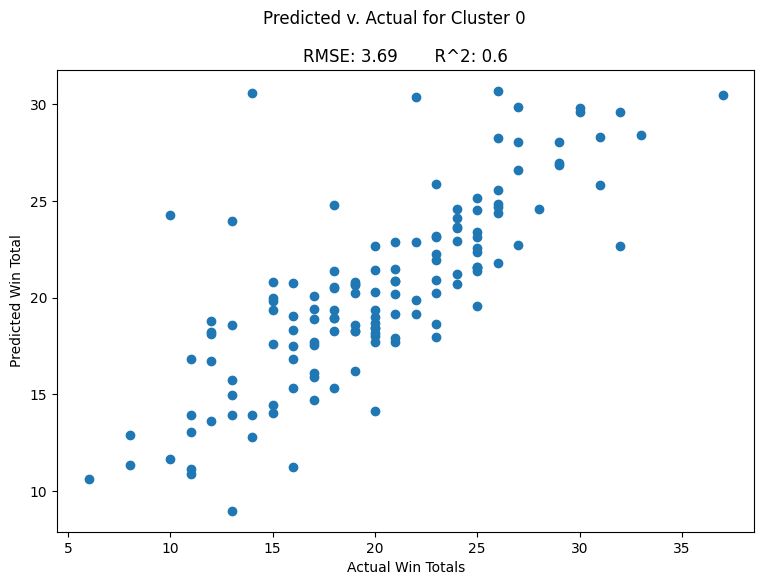

Cluster 0 metrics: rmse: 3.69 r2: 0.6
---RANDOM SEARCH START---
---RANDOM SEARCH DONE---


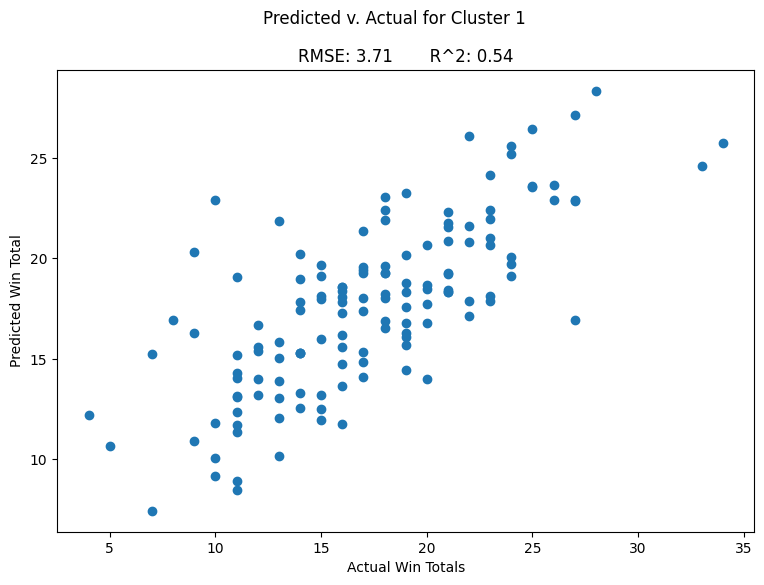

Cluster 1 metrics: rmse: 3.71 r2: 0.54
---RANDOM SEARCH START---
---RANDOM SEARCH DONE---


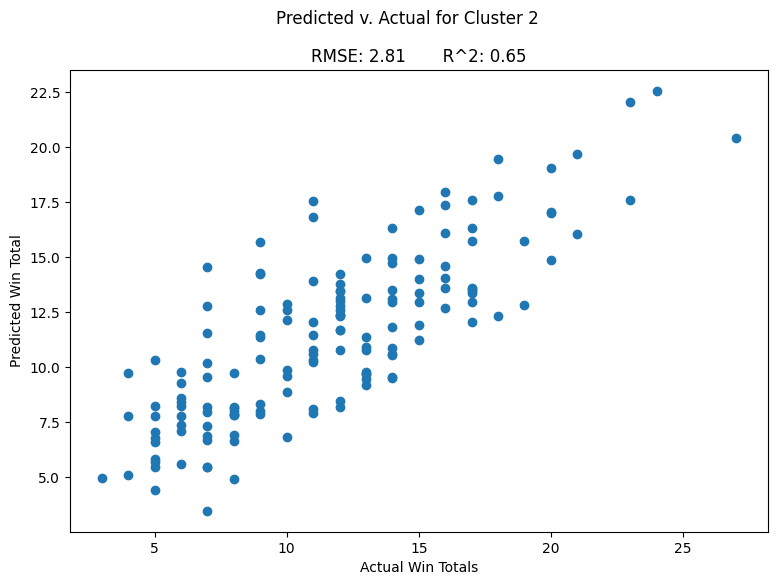

Cluster 2 metrics: rmse: 2.81 r2: 0.65


In [179]:
import pickle

my_coef = []
params = {'n_estimators': randint(50, 5000),
          'learning_rate': uniform(0, 1),
          'reg_alpha': uniform(0, 1),
          'reg_lambda': uniform(0, 1)}

def save_pickle(file, content):
   with open(file, 'wb') as writer:
      pickle.dump(content, writer, pickle.HIGHEST_PROTOCOL)

def train_model(frame):
   cluster_val = frame.Cluster.unique()[0]
   scaler_file = f'C:/Users/Jake/Documents/GitHub/Capstone/data/{cluster_val}_scaler.pickle'
   model_file = f'C:/Users/Jake/Documents/GitHub/Capstone/data/{cluster_val}_model.pickle'
   features = ['blocks', 
               'defensive_rebounds',
               'free_throws_made', 
               'offensive_rebounds',
               'steals', 
               'total_turnovers',
               'three_point_field_goals_made', 
               'three_point_field_goals_attempted',
               'two_point_attempted', 
               'offensive_efficiency',
               'two_point_made', 
               'EFG%', 
               '2PPA',
               '3PPA', 
               'PPA', 
               'def_efficiency', 
               'team_score'
   ]
   per_minute_features = ['blocks', 
                          'defensive_rebounds',
                          'free_throws_made', 
                          'offensive_rebounds',
                          'steals', 
                          'total_turnovers',
                          'three_point_field_goals_made', 
                          'three_point_field_goals_attempted',
                          'two_point_attempted', 
                          'two_point_made', 
                          'team_score'
   ]
   X = frame[features]
   y = frame['win']
   for col in per_minute_features:
      X[col] = X[col] / 40
   X_train, X_test, y_train, y_test = train_test_split(X, 
                                                       y, 
                                                       test_size=.2, 
                                                       random_state=13
   )
   scaler_zero = MinMaxScaler().fit(X_train)
   save_pickle(scaler_file, scaler_zero)
   X_train_sc = scaler_zero.transform(X_train)
   X_test_sc = scaler_zero.transform(X_test)
   print('---RANDOM SEARCH START---')
   model = RandomizedSearchCV(lightgbm.LGBMRegressor(random_state=13),
                                param_distributions=params,
                                n_iter=25,
                                cv=3,
                                random_state=13)
   model.fit(X_train_sc, y_train)
   print('---RANDOM SEARCH DONE---')
   save_pickle(model_file, model.best_estimator_)
   y_pred = model.best_estimator_.predict(X_test_sc)
   rmse = mean_squared_error(y_true=y_test, 
                             y_pred=y_pred, 
                             squared=False)
   r2 = r2_score(y_true=y_test, y_pred=y_pred)
   plt.figure(figsize=(9, 6))
   plt.scatter(x=y_test,
               y=y_pred)  
   plt.suptitle(f'Predicted v. Actual for Cluster {cluster_val}')
   plt.title(f'RMSE: {round(rmse, 2)}       R^2: {round(r2, 2)}')
   plt.xlabel('Actual Win Totals')
   plt.ylabel('Predicted Win Total')
   plt.show()
   print(f'Cluster {cluster_val} metrics: rmse: {round(rmse,2)} r2: {round(r2, 2)}')
   importance = pd.DataFrame(data=list(zip(X_train.columns, model.best_estimator_.feature_importances_)), 
                             columns=['feature', 'coef']
   )
   my_coef.append(importance)
   return None

cluster_data = [cluster_zero,
                cluster_one,
                cluster_two]
for cluster in cluster_data:
   train_model(cluster)

In [121]:
cluster_zero[cluster_zero['win'] == 14]

,team_location,season,team_id,win,games,team_score,assists,blocks,defensive_rebounds,field_goals_made,...,two_point_made,offensive_efficiency,EFG%,2PPA,3PPA,PPA,possesions,team_play%,def_efficiency,Cluster
18,Akron,2018,2006,14,32,71.750000,13.062500,2.531250,23.937500,24.781250,...,15.250000,0.505522,0.518378,1.010956,1.084474,1.036756,67.889062,0.364652,1.108900,0
186,Ball State,2022,2050,14,31,74.322581,13.161290,2.419355,25.935484,25.419355,...,16.870968,0.513739,0.520186,1.004539,1.112680,1.040372,69.700968,0.371589,1.099704,0
196,Bellarmine,2021,91,14,22,74.272727,15.545455,2.272727,22.454545,27.954545,...,21.454545,0.587581,0.567408,1.137243,1.115955,1.134816,64.040455,0.437919,1.030094,0
602,Colgate,2021,2142,14,16,85.187500,17.625000,3.437500,30.062500,30.937500,...,21.687500,0.593210,0.567177,1.088452,1.211474,1.134353,70.900625,0.431643,0.980236,0
730,Dayton,2018,2168,14,31,72.387097,15.741935,2.516129,23.483871,25.935484,...,17.935484,0.545826,0.558775,1.198279,1.003216,1.117549,66.212903,0.399091,1.111525,0
733,Dayton,2021,2168,14,24,69.750000,13.541667,1.958333,26.291667,24.666667,...,16.666667,0.521991,0.556199,1.108515,1.133073,1.112398,65.872083,0.387994,1.028138,0
772,Detroit Mercy,2022,2174,14,30,70.733333,12.066667,1.933333,22.333333,25.066667,...,14.633333,0.516169,0.531827,1.005849,1.116863,1.063654,64.091333,0.382376,1.101560,0
894,Elon,2018,2210,14,32,73.312500,15.843750,2.062500,27.562500,26.312500,...,15.781250,0.529588,0.527068,1.058501,1.055059,1.054136,68.616875,0.379150,1.113020,0
989,Florida Gulf Coast,2019,526,14,32,71.250000,14.031250,4.156250,24.656250,25.281250,...,16.875000,0.510142,0.528440,1.025644,1.105440,1.056880,69.130000,0.366156,1.069767,0
1083,George Mason,2022,2244,14,30,70.733333,14.133333,3.166667,26.400000,25.033333,...,15.700000,0.524954,0.527901,1.041077,1.068896,1.055801,66.016667,0.377281,1.035918,0


In [165]:
import seaborn as sns
coef_0 = my_coef[0]
coef_1 = my_coef[1]
coef_2 = my_coef[2]

coef_0_1_2 = (pd.merge(left=coef_0,
                       right=coef_1,
                       on='feature')
                .rename(columns={'coef_x': 'CLUSTER_0',
                                 'coef_y': 'CLUSTER_1'})
                .merge(coef_2, 
                       on='feature')
                .rename(columns={'coef': 'CLUSTER_2'})
)
coef_0_1_2

,feature,CLUSTER_0,CLUSTER_1,CLUSTER_2
0,blocks,1358,983,1378
1,defensive_rebounds,1020,982,880
2,free_throws_made,1659,1621,1922
3,offensive_rebounds,1038,1200,1460
4,steals,862,1139,1327
5,total_turnovers,1699,1536,1405
6,three_point_field_goals_made,873,784,810
7,three_point_field_goals_attempted,668,552,710
8,two_point_attempted,954,1235,1123
9,offensive_efficiency,1451,1725,1715
